In [1]:
import tweepy, config, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [2]:
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth)

In [3]:
news_account = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@NYT']

In [4]:
df = pd.DataFrame()

In [5]:
for news in news_account:
    sentiment = []
    for tweet in tweepy.Cursor(api.user_timeline, id=news).items(100):
        try:
            analyzer = SentimentIntensityAnalyzer()
            sentiment.append(analyzer.polarity_scores(tweet.text)['compound'])
            
        except tweepy.RateLimitError:
            time.sleep(60*15)
            
    df[news[1:]] = sentiment

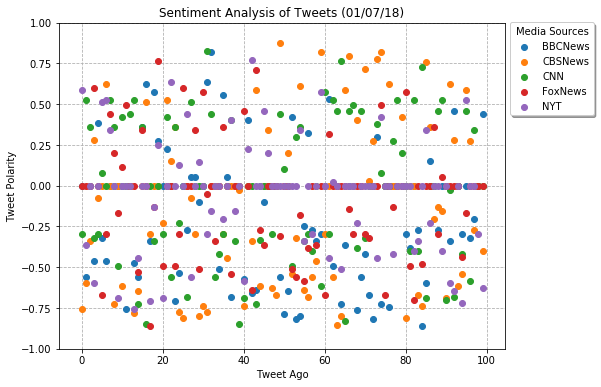

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

for column in df.columns:
    ax.scatter(x=df.index, y=df[column], zorder=3)

ax.set_title('Sentiment Analysis of Tweets ({})'.format(time.strftime("%m/%d/%y", time.gmtime())))
ax.set_xlabel('Tweet Ago')
ax.set_ylabel('Tweet Polarity')
ax.set_ylim(-1,1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc=3, bbox_to_anchor=(1, .70), shadow=True, title='Media Sources')
ax.grid(ls='dashed', zorder=0)

plt.show()

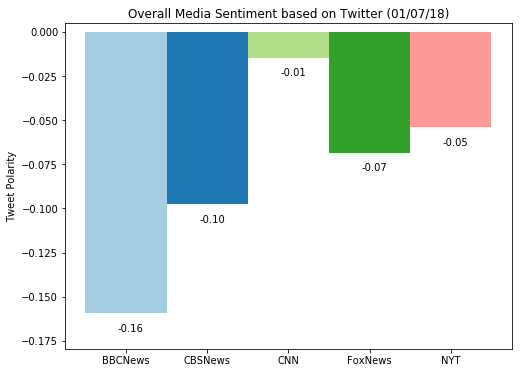

In [7]:
fig, ax = plt.subplots(figsize=(8,6)) 

ax.bar(x=df.columns, height=df.mean(), width=1, color=plt.cm.Paired(np.arange(len(df))))
ax.set_title('Overall Media Sentiment based on Twitter ({})'.format(time.strftime("%m/%d/%y", time.gmtime())))
ax.set_ylabel('Tweet Polarity')
ax.set_ylim(bottom=min(df.mean() - .02), top=max(df.mean() + .02))

for bar in ax.patches:
    ax.text(bar.get_x() + .40, bar.get_height() - .01, "{:.2f}".format(bar.get_height()))

plt.show()